In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true','products')
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


# 1. visualizzare il numero di prodotti di cui non si conosce l'anno del modello

In [3]:
df['model_year'].isnull().sum()

10

# 2. eliminare i prodotti del punto precedente dal dataframe

In [4]:
df.dropna(inplace = True)
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


# 3. contare i prodotti che sono stati presenteti (model_year) nel 2017

In [5]:
df[df['model_year'] == 2017]['product_name'].count()

85

# 4. visualizzare i prodotti che hanno un category_id compreso tra 2 e 4 (estemi inclusi)

In [6]:
df[(df['category_id'] < 4 ) & (df['category_id'] > 2)]['product_name']

11                   Electra Townie Original 21D - 2016
12                   Electra Cruiser 1 (24-Inch) - 2016
13        Electra Girl's Hawaii 1 (16-inch) - 2015/2016
14                                Electra Moto 1 - 2016
15                 Electra Townie Original 7D EQ - 2016
                             ...                       
256    Electra Amsterdam Fashion 3i Ladies' - 2017/2018
257              Electra Amsterdam Royal 8i - 2017/2018
258            Electra Amsterdam Royal 8i Ladies - 2018
259         Electra Townie Balloon 3i EQ Ladies' - 2018
260                 Electra Townie Balloon 7i EQ - 2018
Name: product_name, Length: 76, dtype: object

#5. visualizzare i prodotti che hanno la parola Trek nel nome


In [7]:
df[df['product_name'].str.contains('Trek')]

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
6,7,Trek Slash 8 27.5 - 2016,9,6,2016.0,3999.99
7,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016.0,1799.99
28,29,Trek X-Caliber 8 - 2017,9,6,2017.0,999.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


# 6. visualizzare il numero di prodotti per ogni categoria (visualizzare il numero della categoria e il numero di prodotti)

In [8]:
df.groupby('category_id')['product_name'].count()

category_id
1    57
2    28
3    76
4    10
5    22
6    59
7    59
Name: product_name, dtype: int64

#7. visualizzare le categorie che hanno più di 50 prodotti visualizzare il numero della categoria e il numero di prodotti)


In [9]:
df1 = df.groupby('category_id').count()
df1[df1["product_name"] > 50].reset_index()[['category_id', 'product_id']]

,category_id,product_id
0,1,57
1,3,76
2,6,59
3,7,59


#metodo 2 del 7(modifica 6)

In [10]:
df2 =df.groupby('category_id')['product_name'].count()
df2

category_id
1    57
2    28
3    76
4    10
5    22
6    59
7    59
Name: product_name, dtype: int64

In [11]:
df2[df2.values > 50]

category_id
1    57
3    76
6    59
7    59
Name: product_name, dtype: int64

# 8, visualizzare uno stacked bar chart che riporti il numero di prodotti presentati per ogni anno in ogni categoria. Il grafico deve presentare sulle ascisse il numero della categoria e sulle ordinate il numero di prodotti, divisi per ann

In [12]:
import matplotlib.pyplot as plt


In [13]:
df.groupby(['model_year','category_id']).count()

product_id  product_name  brand_id  list_price
model_year category_id                                                
2016.0     1                     3             3         3           3
           2                     3             3         3           3
           3                     9             9         9           9
           4                     2             2         2           2
           6                     8             8         8           8
2017.0     1                    19            19        19          19
           2                    10            10        10          10
           3                    19            19        19          19
           4                     2             2         2           2
           5                     2             2         2           2
           6                    21            21        21          21
           7                    12            12        12          12
2018.0     1                    35            35        35          35
           2                    15            15        15          15
           3                    48            48        48          48
           4                     6             6         6           6
           5                    20            20        20          20
           6                    30            30        30          30
           7                    41            41        41          41
2019.0     7                     6             6         6           6

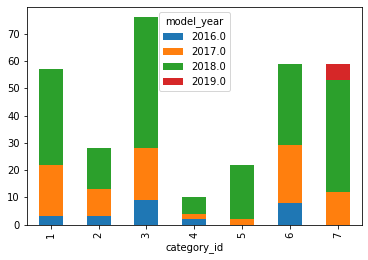

In [14]:


df4 = df.groupby('category_id',)['model_year'].value_counts().unstack(level=1).plot.bar(stacked=True)

# 9. visualizzare un pie chart che riporti in numero di prodotti presentati in ogni anno.

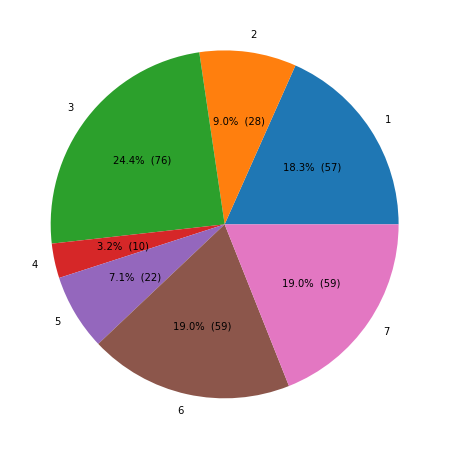

In [15]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.pie(df2.values,labels =df2.index,autopct=lambda x: '{:.1f}%  ({:,.0f})'.format(x,x * sum(df2.values)/100))
plt.show()

# 10. salvare in un file png i due grafici affiancati

([<matplotlib.patches.Wedge at 0x7f4981e86190>,
 [Text(0.9226384857628923, 0.5989475975318351, '1'),
  Text(0.1495440396355308, 1.089787401381337, '2'),
  Text(-0.8712774726682381, 0.6714726841956029, '3'),
  Text(-1.0753423930344375, -0.23160038372802755, '4'),
  Text(-0.9460800980117723, -0.5611884248147279, '5'),
  Text(-0.23702874666549076, -1.0741589143391153, '6'),
  Text(0.910350402416192, -0.6174642862714226, '7')],
 [Text(0.5032573558706684, 0.32669868956281917, '18.3%  (57)'),
  Text(0.08156947616483498, 0.5944294916625473, '9.0%  (28)'),
  Text(-0.47524225781903884, 0.3662578277430561, '24.4%  (76)'),
  Text(-0.5865503962006022, -0.12632748203346955, '3.2%  (10)'),
  Text(-0.516043689824603, -0.30610277717166967, '7.1%  (22)'),
  Text(-0.12928840727208585, -0.5859048623667901, '19.0%  (59)'),
  Text(0.4965547649542865, -0.33679870160259406, '19.0%  (59)')])

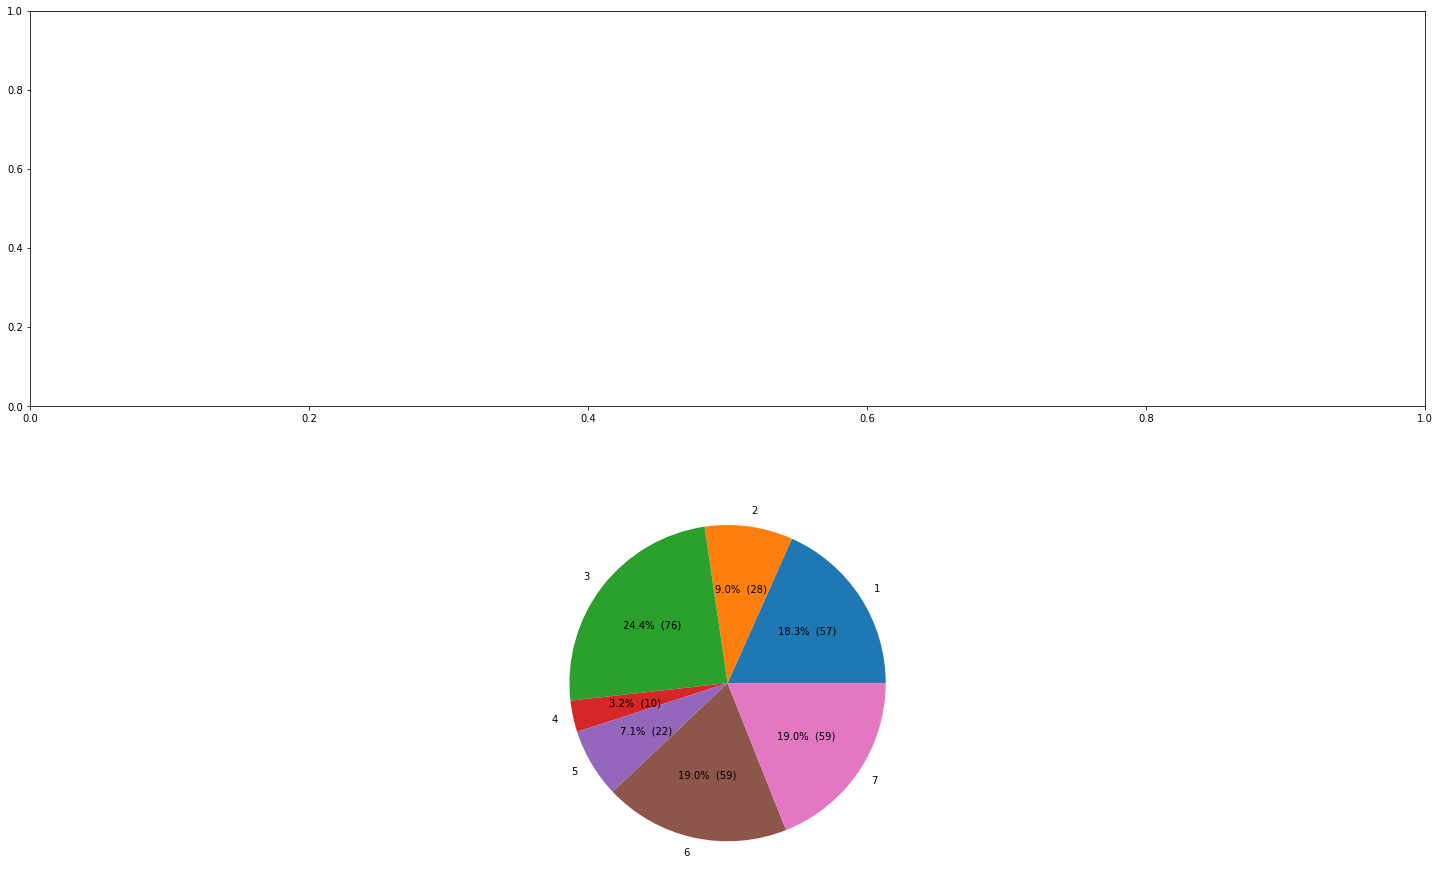

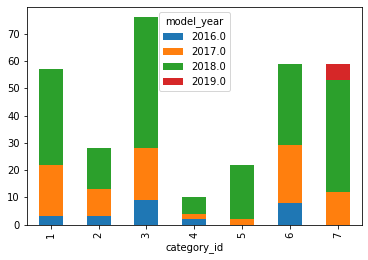

In [16]:
fig,(ax1,ax2)= plt.subplots(2,1)
fig.set_size_inches(25,16)
ax1.df4 = df.groupby('category_id',)['model_year'].value_counts().unstack(level=1).plot.bar(stacked=True)
ax2.pie(df2.values,labels =df2.index,autopct=lambda x: '{:.1f}%  ({:,.0f})'.format(x,x * sum(df2.values)/100))